# 📝 🔍 Unsupervised Learning: K-Means Clustering in Engineering


## 🎯 Learning Objectives
By the end of this lecture, you should be able to:
- Understand the concept of Unsupervised Learning.
- Explain how K-Means Clustering works.
- Apply K-Means to real-world engineering problems using scikit-learn.
- Evaluate clustering results using basic metrics and visualizations.


## 🤖 What is Unsupervised Learning?
Unsupervised Learning finds patterns in unlabeled data without any prior knowledge of output labels.
- No Labels: The algorithm doesn’t know the outcome; it only sees input features.
- Objective: Group similar data points or reduce dimensions for visualization.


### Why is Unsupervised Learning Important in Engineering?
- Anomaly Detection – Identify unusual patterns in machinery data for predictive maintenance.
- Customer Segmentation – Group users based on behavior for targeted marketing.
- Material Classification – Categorize materials based on physical properties.
- Sensor Data Analysis – Find patterns in multivariate time-series data.


## 🔑 Key Concepts in Clustering

1. Clusters – Groups of similar data points.

2. Centroids – Central points of clusters.

3. Distance Metric – Usually Euclidean distance to measure similarity.

4. Inertia – Sum of squared distances from each point to its centroid (used to evaluate clustering).


### Example: Clustering Mechanical Components
- Features: Weight, Size, Durability
- Goal: Automatically group similar parts to optimize inventory and production.


## 💡 What is K-Means Clustering?
K-Means is an unsupervised algorithm that groups data into K clusters by minimizing the distance between data points and cluster centroids.


### How K-Means Works

1. Choose K: Decide the number of clusters.

2. Initialize Centroids: Randomly place K centroids.

3. Assign Points: Assign each point to the nearest centroid.

4. Update Centroids: Recalculate the centroids as the mean of all assigned points.

5. Repeat: Continue assigning points and updating centroids until convergence.


/tmp/ipykernel_2503906/2683800182.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[:, 0], X[:, 1], c=c, cmap="viridis", s=50 * factor, alpha=0.3)


Text(0.98, 0.98, 'Final Clustering')

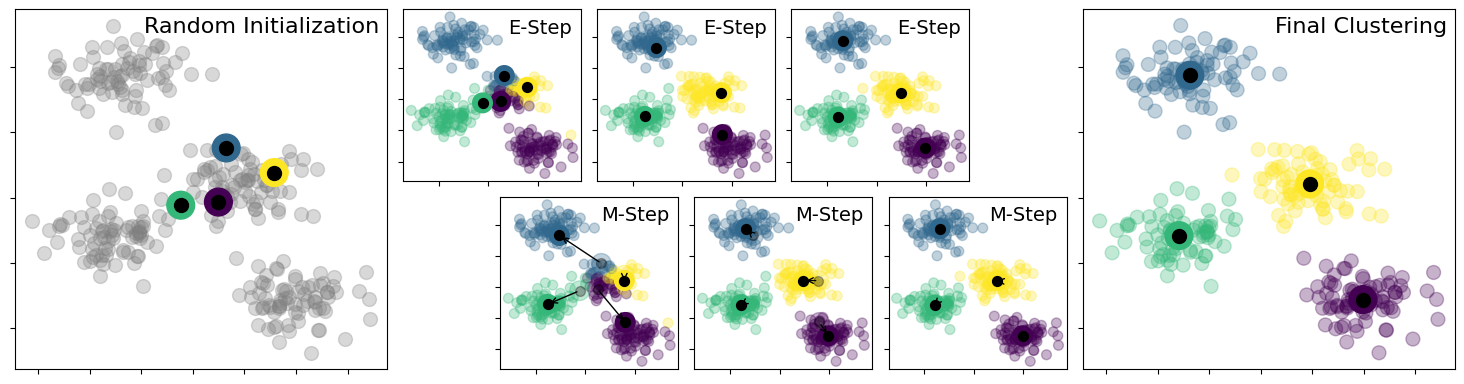

In [4]:
import numpy as np
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin
from sklearn.neighbors import kneighbors_graph
from matplotlib import pyplot as plt


X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

rng = np.random.RandomState(42)
centers = [0, 4] + rng.randn(4, 2)


def draw_points(ax, c, factor=1):
    ax.scatter(X[:, 0], X[:, 1], c=c, cmap="viridis", s=50 * factor, alpha=0.3)


def draw_centers(ax, centers, factor=1, alpha=1.0):
    ax.scatter(
        centers[:, 0],
        centers[:, 1],
        c=np.arange(4),
        cmap="viridis",
        s=200 * factor,
        alpha=alpha,
    )
    ax.scatter(centers[:, 0], centers[:, 1], c="black", s=50 * factor, alpha=alpha)


def make_ax(fig, gs):
    ax = fig.add_subplot(gs)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    return ax


fig = plt.figure(figsize=(15, 4))
gs = plt.GridSpec(
    4, 15, left=0.02, right=0.98, bottom=0.05, top=0.95, wspace=0.2, hspace=0.2
)
ax0 = make_ax(fig, gs[:4, :4])
ax0.text(
    0.98,
    0.98,
    "Random Initialization",
    transform=ax0.transAxes,
    ha="right",
    va="top",
    size=16,
)
draw_points(ax0, "gray", factor=2)
draw_centers(ax0, centers, factor=2)

for i in range(3):
    ax1 = make_ax(fig, gs[:2, 4 + 2 * i : 6 + 2 * i])
    ax2 = make_ax(fig, gs[2:, 5 + 2 * i : 7 + 2 * i])

    # E-step
    y_pred = pairwise_distances_argmin(X, centers)
    draw_points(ax1, y_pred)
    draw_centers(ax1, centers)

    # M-step
    new_centers = np.array([X[y_pred == i].mean(0) for i in range(4)])
    draw_points(ax2, y_pred)
    draw_centers(ax2, centers, alpha=0.3)
    draw_centers(ax2, new_centers)
    for i in range(4):
        ax2.annotate(
            "",
            new_centers[i],
            centers[i],
            arrowprops=dict(arrowstyle="->", linewidth=1),
        )

    # Finish iteration
    centers = new_centers
    ax1.text(
        0.95, 0.95, "E-Step", transform=ax1.transAxes, ha="right", va="top", size=14
    )
    ax2.text(
        0.95, 0.95, "M-Step", transform=ax2.transAxes, ha="right", va="top", size=14
    )


# Final E-step
y_pred = pairwise_distances_argmin(X, centers)
axf = make_ax(fig, gs[:4, -4:])
draw_points(axf, y_pred, factor=2)
draw_centers(axf, centers, factor=2)
axf.text(
    0.98,
    0.98,
    "Final Clustering",
    transform=axf.transAxes,
    ha="right",
    va="top",
    size=16,
)

### Why Use K-Means?
✅ Simple and fast for large datasets.\
✅ Scalable to high-dimensional data.\
✅ Versatile – Works well for a variety of clustering tasks.\


## 🔄 Applying K-Means Clustering in Engineering

### Example: Clustering Material Properties
- Dataset: Mechanical properties of materials (Density, Hardness, Tensile Strength).\
- Goal: Group materials with similar properties for better inventory management.\


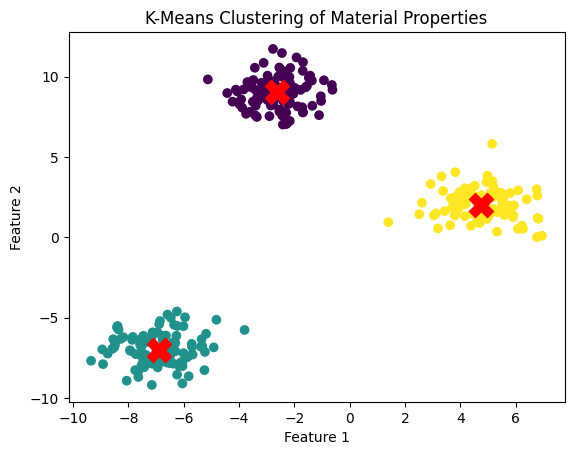

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data for clustering
X, _ = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=1.0)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap="viridis")
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=300,
    c="red",
    marker="X",
)
plt.title("K-Means Clustering of Material Properties")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Explanation
- K = 3 specifies 3 clusters.
- Red Xs mark the centroids of each cluster.
- The data points are colored by cluster assignment.


## 📊 Real-World Applications in Engineering
- Predictive Maintenance – Group similar machine behaviors to identify anomalies.
- Quality Control – Automatically categorize products based on measurements.
- Customer Segmentation – Group industrial clients for targeted sales strategies.
- Resource Optimization – Cluster resource consumption patterns for cost efficiency.


### Example: Industrial Sensor Data
- Use K-Means to cluster sensor readings (e.g., temperature, pressure) to detect unusual patterns or faults.


## 📌 Key Takeaways
✅ Unsupervised Learning finds patterns without labeled data.\
✅ K-Means Clustering groups data by minimizing distances to cluster centroids.\
✅ Choosing K is crucial – use the Elbow Method for guidance.\
✅ Versatile Applications in predictive maintenance, quality control, and inventory management.\
✅ scikit-learn provides easy-to-use tools for implementing K-Means in Python.\

🔍 Clustering helps engineers uncover hidden patterns and optimize processes!